Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде 2

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.DataFrame(
    {
        'C': [0.1, 0.2, 0.3, 0.4, 0.5],
        'T1': [16.36, 21.17, 26.06, 32.47, 41.11],
        'T2': [16.58, 21.17, 26.15, 32.50, 41.09]
    }
)

T_H2O = sum([10.83, 10.82])/2

data['T'] = data[['T1', 'T2']].mean(axis=1)
data = data.drop(['T1', 'T2'], axis=1)

data['n_ud'] = (data['T']-T_H2O)/T_H2O
data['n_pr'] = data['n_ud']/data['C']
data['n_rel'] = data['T']/T_H2O
data['ln/C'] = np.log(data['n_rel'])/data['C']
print(data)

     C       T      n_ud      n_pr     n_rel      ln/C
0  0.1  16.470  0.521478  5.214781  1.521478  4.196823
1  0.2  21.170  0.955658  4.778291  1.955658  3.353634
2  0.3  26.105  1.411547  4.705158  2.411547  2.934229
3  0.4  32.485  2.000924  5.002309  3.000924  2.747300
4  0.5  41.100  2.796767  5.593533  3.796767  2.668300


[4.279071]
0.8528726253523229


<Axes: >

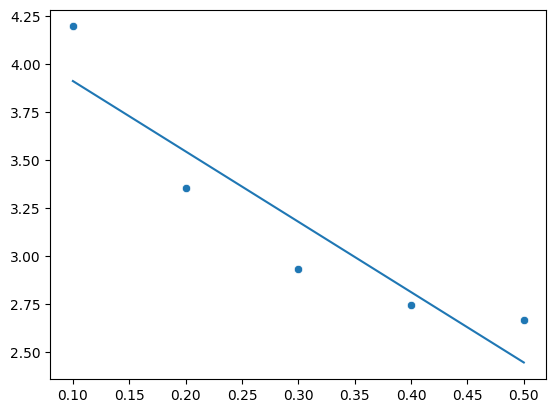

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data['C'].to_numpy().reshape(-1, 1)
y = data['ln/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

print(model.intercept_)
print(r2_score(y, y_pred))

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X.ravel(), y=y_pred.ravel())

[5.97721324]
0.9988809617220946


<Axes: >

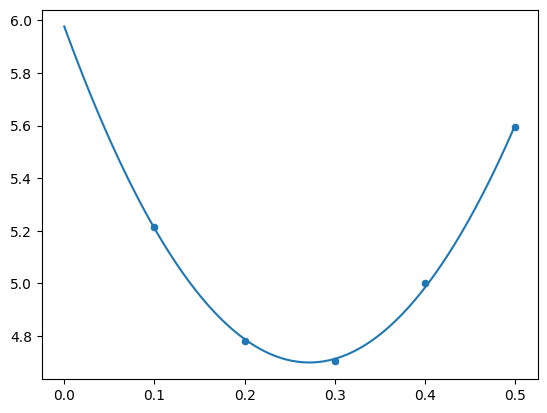

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_pr'].to_numpy().reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X_poly, y=y)
y_pred = model.predict(X_poly)

print(model.intercept_)
print(r2_score(y, y_pred))

X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
X_line_poly = poly.fit_transform(X_line)
y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())